In [1]:
import random
import copy
import logging
import sys
import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210614_1ba_signal_vs_noise_50'

data_script = 'batch_210608_stability_vs_redundancy_1ba'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'

n_mfs = 488
n_grcs = 1459
pattern_type = 'binary'
db = {}
direction = '01'
noise = '0.5'

model = 'shuffle'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

model = 'global_random'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

def get_average_signal_strength(hist_sum):
    return sum(hist_sum)/len(hist_sum)
        


In [2]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'shuffle': "Shuffle",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['shuffle']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


mpd = MyPlotData()
ress_ref = db['shuffle'][0][0]
resss_ref2 = db['shuffle'][0]
for model_name in [
        'shuffle',
        'global_random',
        ]:
    ress = db[model_name]
    ress_tries = ress[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        if n_try >= len(resss_ref2):
            print(n_try)
            continue
        ress_ref2 = resss_ref2[n_try]
        for noise in ress:
            res = ress[noise]
            res_ref2 = ress_ref2[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                avg_signal=get_average_signal_strength(res['hist_sum']),
                noise=noise,
                )


Height: 7.518796992481203, Aspect: 1.33


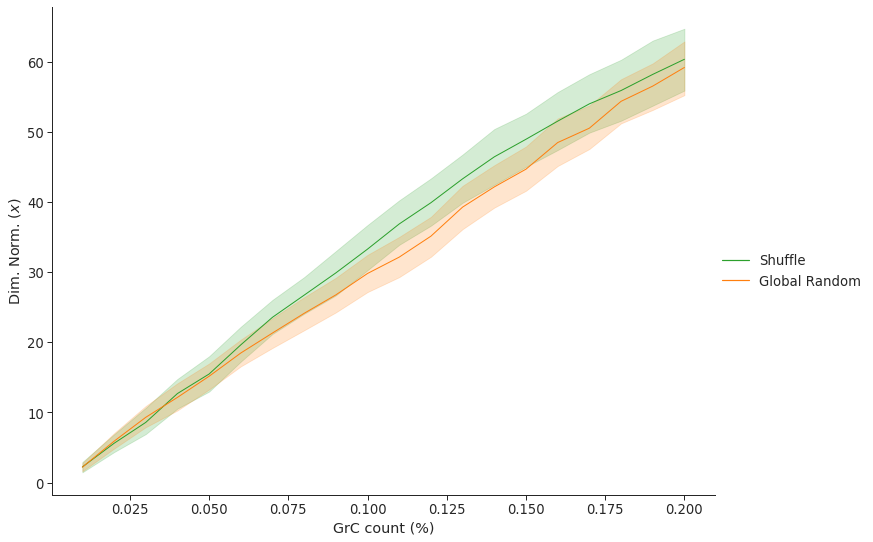

In [3]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='avg_signal',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Dim. Norm. ($x$)',
    x_axis_label='GrC count (%)',
    save_filename=f'{script_n}.svg',
    show=True,
    )
